In [3]:
import IPython.core.display as di
#import datetime as dt
#from ImpTes import import_data_refactor

import pandas as pd
import numpy as np
import IPython.core.display as di
import statsmodels

#import datetime
import math as math

import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import acf, pacf
from pandas import read_csv
from pandas import set_option
from pandas import concat
#from pandas.tools.plotting import scatter_matrix
from pandas.plotting import scatter_matrix

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.gofplots import qqplot

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


from pandas import tseries
from pandas import Series
from pandas import DataFrame
from pandas import TimeGrouper
from pandas.plotting import autocorrelation_plot

from sklearn.metrics import mean_squared_error
from numpy import mean
from math import sqrt
from scipy.signal import savgol_filter
#get_ipython().magic(u'matplotlib inline')

#import InitTrain
#from InitTrain import *
#import finfun
#from finfun import *
from collections import namedtuple
#import dL
#import trainModelApp

import glob, os, sys

np.set_printoptions(threshold='nan')
get_ipython().magic(u'matplotlib inline')
plt.style.use('seaborn')

In [47]:
path = '/Users/vincenzobattista/Desktop/ResourceAwareMachineLearning/HandsOn/Data2Learn/Merged_'
filenames = list(glob.glob(path+'*.csv'))
data_list = []
data = pd.DataFrame()
for filen in filenames:
    print(filen)
    try:
        df = pd.read_csv( filen, na_values='.', sep = ',', index_col=None, parse_dates=True )
    except:
        print("ERROR!")
    data_list.append( df )
data = pd.concat(data_list)

# correct for outliers
data = data.query("Temp>0")

/Users/vincenzobattista/Desktop/ResourceAwareMachineLearning/HandsOn/Data2Learn/Merged_B100Data20Sep2017132054.csv
/Users/vincenzobattista/Desktop/ResourceAwareMachineLearning/HandsOn/Data2Learn/Merged_B100Data20Sep2017133512.csv
/Users/vincenzobattista/Desktop/ResourceAwareMachineLearning/HandsOn/Data2Learn/Merged_B100Data20Sep2017135527.csv
/Users/vincenzobattista/Desktop/ResourceAwareMachineLearning/HandsOn/Data2Learn/Merged_B100Data20Sep2017142352.csv
/Users/vincenzobattista/Desktop/ResourceAwareMachineLearning/HandsOn/Data2Learn/Merged_B100Data20Sep2017145137.csv
/Users/vincenzobattista/Desktop/ResourceAwareMachineLearning/HandsOn/Data2Learn/Merged_B100Data20Sep2017150923.csv
/Users/vincenzobattista/Desktop/ResourceAwareMachineLearning/HandsOn/Data2Learn/Merged_B100Data20Sep2017153915.csv
/Users/vincenzobattista/Desktop/ResourceAwareMachineLearning/HandsOn/Data2Learn/Merged_B100Data20Sep2017160553.csv
/Users/vincenzobattista/Desktop/ResourceAwareMachineLearning/HandsOn/Data2Learn/

In [28]:
# Summarize Data

# Descriptive statistics
# shape
print(data.shape)
# head
print(data.head(20))
# descriptions
print(data.describe())

(43040, 14)
                                UNIX_T  RSSI1  RSSI2  RSSI3  Lux  Acc_x  \
Time                                                                      
2017-09-20 13:20:57.351  1505906457351     56     75     47   63  -1106   
2017-09-20 13:20:57.402  1505906457402     43     53     63   70  -1038   
2017-09-20 13:20:57.453  1505906457453     53     59     64   93  -1090   
2017-09-20 13:20:57.503  1505906457503     51     66     64  162  -1074   
2017-09-20 13:20:57.555  1505906457555     51     64     60   82  -1051   
2017-09-20 13:20:57.603  1505906457603     57     58     55  144  -1094   
2017-09-20 13:20:57.654  1505906457654     63     66     61  149  -1007   
2017-09-20 13:20:57.707  1505906457707     52     48     56   83  -1091   
2017-09-20 13:20:57.751  1505906457751     54     70     60  156  -1030   
2017-09-20 13:20:57.808  1505906457808     58     62     57  161  -1086   
2017-09-20 13:20:57.853  1505906457853     63     71     51   85  -1051   
2017-09-20 13

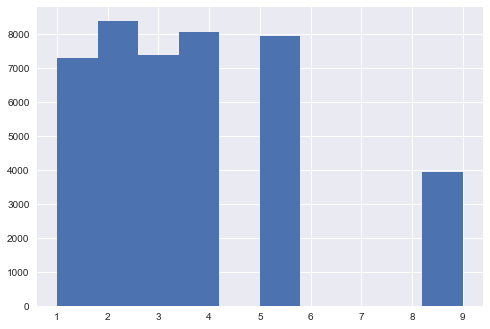

In [36]:
fig = plt.plot()
data["Co"].hist()

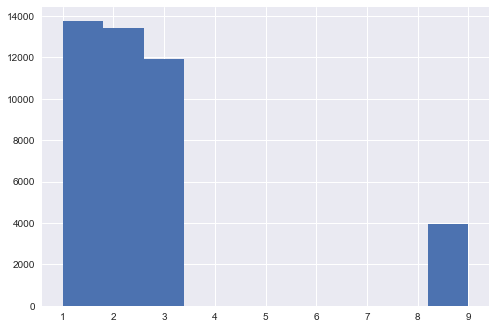

In [35]:
fig = plt.plot()
data["Ro"].hist()

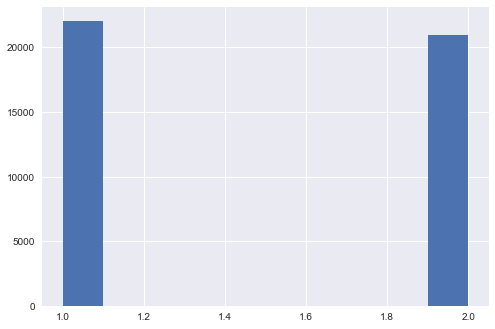

In [37]:
fig = plt.plot()
data["Si"].hist()

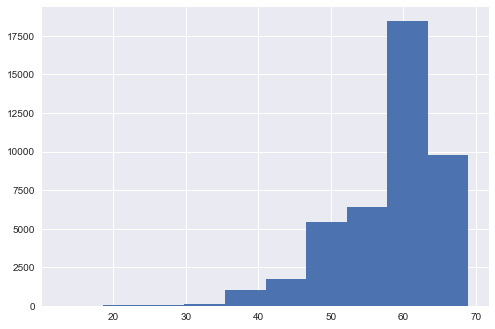

In [54]:
fig = plt.plot()
data["RSSI3"].hist()

In [58]:
sub_data = data[["RSSI1","RSSI2","RSSI3","Lux","ID"]]
target = data["Pos"]
X_train, y_train, X_test, y_test = train_test_split(sub_data,target)

In [59]:
sub_data.corr()

,RSSI1,RSSI2,RSSI3,Lux,ID
RSSI1,1.000000,0.334815,-0.148520,-0.105468,0.063966
RSSI2,0.334815,1.000000,-0.196445,-0.048162,0.060943
RSSI3,-0.148520,-0.196445,1.000000,0.013434,0.018269
Lux,-0.105468,-0.048162,0.013434,1.000000,0.030625
ID,0.063966,0.060943,0.018269,0.030625,1.000000


In [ ]:
clf = DecisionTreeClassifier(max_depth=30)


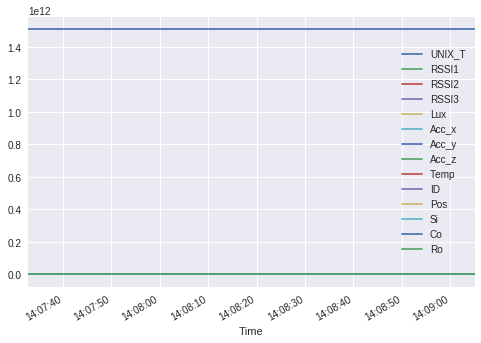

In [7]:
# Summarize Data

# Descriptive statistics
# shape
print(data.shape)
# head
print(data.head(20))
# descriptions
print(data.describe())
# class distribution
print(dataset.groupby('class').size())

# Data visualizations

# box and whisker plots
data.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False)
plt.show()
# histograms
dataset.hist()
plt.show()
# scatter plot matrix
scatter_matrix(dataset)
plt.show()

# Prepare Data

# Split-out validation dataset
array = dataset.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = KFold(n_splits=10, random_state=seed)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Make predictions on validation dataset
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))


